In [117]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import csv

# Payload Data

In [118]:
def csvBreaks(df):
    previousFile = 0
    allBreaks = []
    for index, row in df.iterrows():
        currentFile = row['DataFileNumber']
        if not (currentFile == previousFile):
            allBreaks.append(row['Time'])
        previousFile = currentFile
    return allBreaks

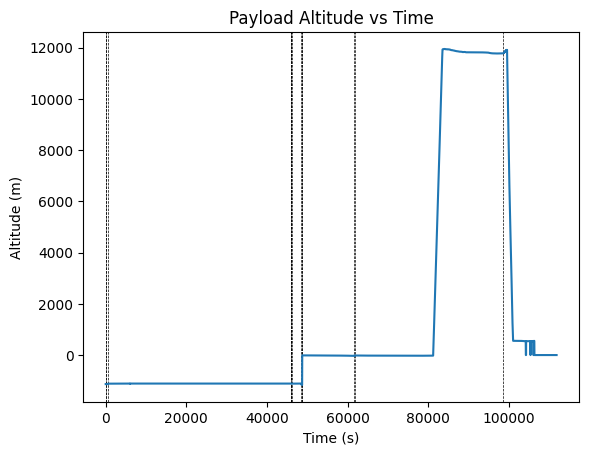

In [125]:
df = pd.read_csv('../data/modified/formattedData.csv')

for b in csvBreaks(df):
	plt.axvline(x=b, color='black', ls='--',lw=0.5)

plt.plot(df['Time'], df['Altitude'])
plt.title('Payload Altitude vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')
plt.savefig('../results/plots/altitude_vs_time.png')
plt.show()

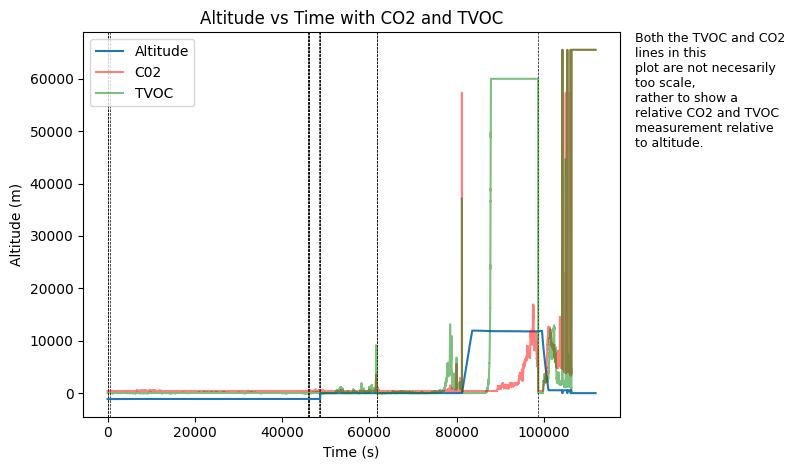

In [120]:
df = pd.read_csv('../data/modified/formattedData.csv')

for b in csvBreaks(df):
    plt.axvline(x=b, color='black', ls='--',lw=0.5)

plt.plot(df['Time'], df['Altitude'],label="Altitude")
plt.plot(df['Time'],df['CO2'],alpha=0.5,color='r',label='C02')
plt.plot(df['Time'],df['TVOC'],alpha=0.5,color='g',label='TVOC')
plt.title('Altitude vs Time with CO2 and TVOC')
plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')
plt.legend()

plt.figtext(
    x=1,
    y=0.8,
    s='Both the TVOC and CO2 \nlines in this \nplot are not necesarily\ntoo scale,\nrather to show a \nrelative CO2 and TVOC \nmeasurement relative \nto altitude.',
    fontsize=9,
    color='black',
    ha='left', 
    va='center'  
)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig('../results/plots/Altitude_vs_Time_with_CO2_and_TVOC', bbox_inches='tight')
plt.show()

# GPS Data

In [121]:
from scipy.signal import correlate

dfPayload = pd.read_csv('../data/modified/formattedData.csv')
dfGPS = pd.read_csv('../data/modified/formattedGPSData.csv')

cross_corr = correlate(dfPayload['Altitude'], dfGPS['BAR ALT'], mode='valid', method='fft')
offset = np.argmax(cross_corr)
print(offset)

78633


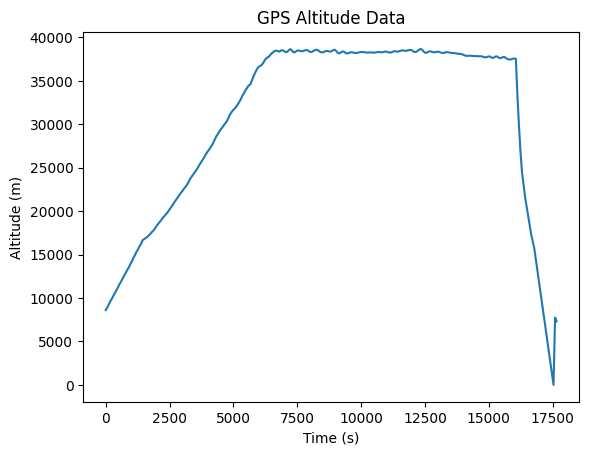

In [122]:
df = pd.read_csv('../data/modified/formattedGPSData.csv')

plt.plot(df['TIME'],df['GPS ALT'])
plt.title('GPS Altitude Data')
plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')
plt.savefig('../results/plots/GPS_Altitude_Data')
plt.show()

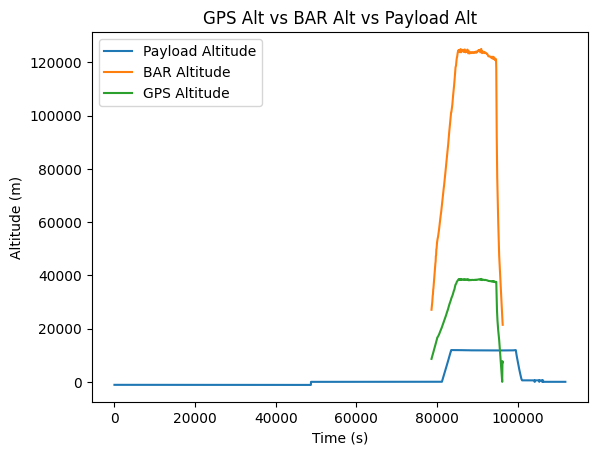

In [124]:
dfPayload = pd.read_csv('../data/modified/formattedData.csv')
dfGPS = pd.read_csv('../data/modified/formattedGPSData.csv')

dfGPS['TIME'] = dfGPS['TIME'] + offset

plt.plot(dfPayload['Time'],dfPayload['Altitude'],label='Payload Altitude')
plt.plot(dfGPS['TIME'],dfGPS['BAR ALT'], label='BAR Altitude')
plt.plot(dfGPS['TIME'],dfGPS['GPS ALT'],label='GPS Altitude')

plt.ylabel('Altitude (m)')
plt.xlabel('Time (s)')
plt.title('GPS Alt vs BAR Alt vs Payload Alt')
plt.legend()
plt.savefig('../results/plots/Altitudes_GPS_vs_BAR_vs_Payload')
plt.show()